In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [45]:
insurance_data = pd.read_csv('insurance.csv')

In [65]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [66]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [67]:
insurance_data.describe().round(2)

,age,bmi,children,charges,log_charges
count,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42,9.10
std,14.05,6.10,1.21,12110.01,0.92
min,18.00,15.96,0.00,1121.87,7.02
25%,27.00,26.30,0.00,4740.29,8.46
50%,39.00,30.40,1.00,9382.03,9.15
75%,51.00,34.69,2.00,16639.91,9.72
max,64.00,53.13,5.00,63770.43,11.06


In [68]:
insurance_data.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

In [69]:
insurance_data['log_charges'] = np.log(insurance_data['charges'])


In [70]:
X = insurance_data.drop(columns=['charges', 'log_charges'])
y = insurance_data['log_charges']

In [73]:
X = pd.get_dummies(X, drop_first=True)

In [74]:
print('Kolumny po kodownaniu:\n', X.columns)
print(X.head())

Kolumny po kodownaniu:
 Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [76]:
X= sm.add_constant(X)  # Dodanie stałej do modelu
print("Kolumny po dodaniu stałej:")
print(X.columns)

print("\nPierwsze wiersze:")
print(X.head())

Kolumny po dodaniu stałej:
Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

Pierwsze wiersze:
   const  age     bmi  children  sex_male  smoker_yes  region_northwest  \
0    1.0   19  27.900         0     False        True             False   
1    1.0   18  33.770         1      True       False             False   
2    1.0   28  33.000         3      True       False             False   
3    1.0   33  22.705         0      True       False              True   
4    1.0   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [77]:
bool_cols = X.select_dtypes(include=['bool']).columns

In [78]:
bool_cols

Index(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [79]:
X[bool_cols] = X[bool_cols].astype(float)

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             1338 non-null   float64
 1   age               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 94.2 KB


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model= sm.OLS(y_train, x_train).fit()

In [92]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     413.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          7.72e-320
Time:                        20:57:14   Log-Likelihood:                -661.37
No. Observations:                1070   AIC:                             1341.
Df Residuals:                    1061   BIC:                             1386.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0463      0.082  

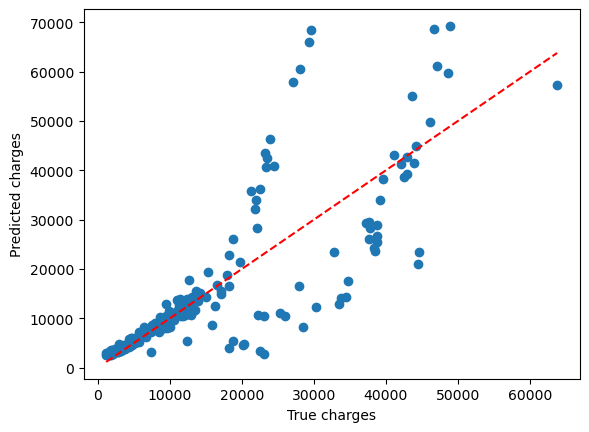

In [94]:
y_pred_log = model.predict(x_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

import matplotlib.pyplot as plt
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()], 'r--')
plt.xlabel("True charges")
plt.ylabel("Predicted charges")
plt.show()


In [104]:
X_nl = X.copy()

X_nl['age_c'] = X_nl['age'] - X_nl['age'].mean()
X_nl['age_c_sq'] = X_nl['age_c'] ** 2
X_nl['bmi_sq'] = X_nl['bmi'] ** 2


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X_nl, y, test_size=0.2, random_state=42)

In [106]:
model1= sm.OLS(y_train, x_train).fit()

In [107]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     336.6
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          1.73e-320
Time:                        21:05:32   Log-Likelihood:                -653.75
No. Observations:                1070   AIC:                             1330.
Df Residuals:                    1059   BIC:                             1384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0091      0.000  

In [109]:
model_log_robust = sm.OLS(y_train, x_train).fit(cov_type='HC3')
print(model_log_robust.summary())
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 6.080e+04
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:09:06   Log-Likelihood:                -653.75
No. Observations:                1070   AIC:                             1330.
Df Residuals:                    1059   BIC:                             1384.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0091      0.000  